<a href="https://www.kaggle.com/code/dineshkumarsdk/linear-regression?scriptVersionId=121753317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sars-outbreak-2003-complete-dataset/summary_data_clean.csv
/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv


In [2]:
#y=mx+c 

In [3]:
df = pd.read_csv("/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative number of case(s)  2538 non-null   int64 
 3   Number of deaths              2538 non-null   int64 
 4   Number recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 99.3+ KB


In [5]:
df = df.rename(columns={'Cumulative number of case(s)':'Cumulative_Cases','Number of deaths':'Death_Count', 'Number recovered':'Recovered_Count'})

EDA

In [6]:
df.Date = df.Date.apply(pd.to_datetime)

<AxesSubplot:title={'center':'SARS'}, xlabel='Cumulative_Cases', ylabel='Death_Count'>

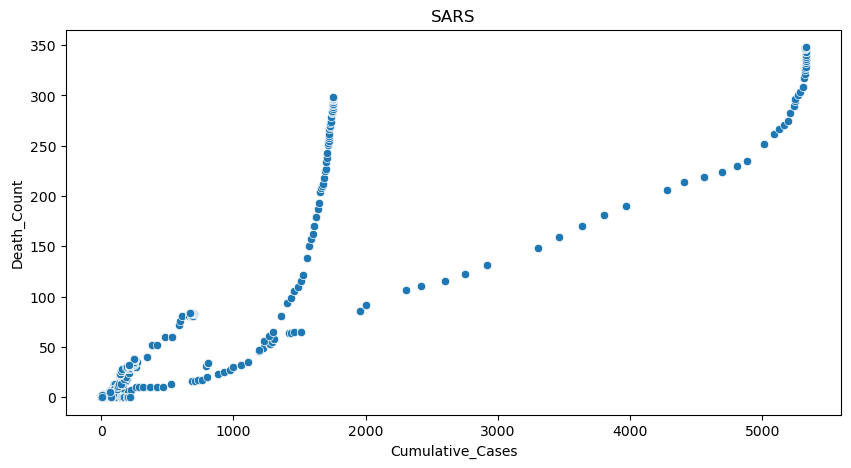

In [7]:
plt.figure(figsize=[10,5])
plt.title("SARS")
sns.scatterplot(x=df['Cumulative_Cases'],y=df['Death_Count'])

<AxesSubplot:xlabel='Cumulative_Cases', ylabel='Death_Count'>

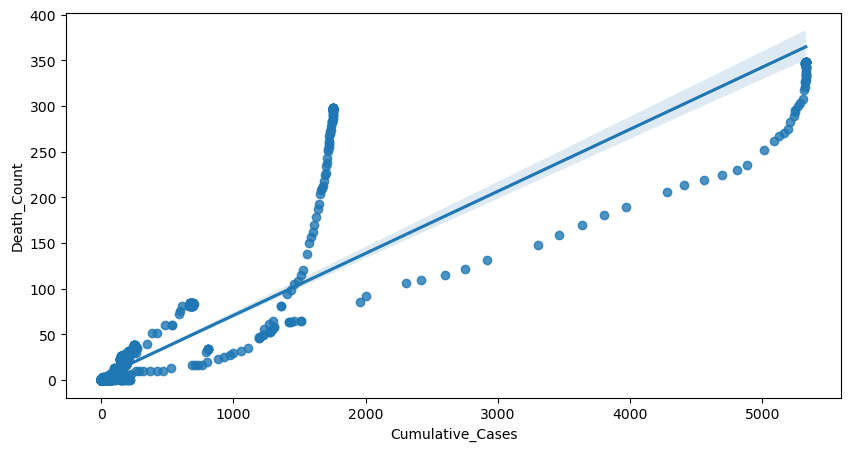

In [8]:
plt.figure(figsize = [10,5])
sns.regplot(x=df['Cumulative_Cases'],y=df['Death_Count'])

In [9]:
df['Day_of_the_year'] = df.Date.dt.strftime("%d").astype(int)
df['Week_of_the_year'] = df.Date.dt.strftime("%w").astype(int)
df['Month_of_the_year'] = df.Date.dt.strftime("%m").astype(int)
df.drop(['Date'], inplace = True, axis=1)

In [10]:
obj_type_features = df.select_dtypes(include="object").columns
print(obj_type_features)
print(df.Country)

Index(['Country'], dtype='object')
0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Country = le.fit_transform(df.Country)
print(df.Country)

0        9
1        4
2       26
3       10
4       31
        ..
2533    31
2534    33
2535    34
2536    35
2537    36
Name: Country, Length: 2538, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['Death_Count'],axis =1)
y = df['Death_Count']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [14]:
print(y_pred)

[ 1.21867766e+02  7.62158132e-01  1.43532410e+00  3.97765279e+02
  1.67575970e+01  1.89400981e+01  7.90467069e+00  4.82664305e+00
  4.44801074e-01  1.43712761e-01  1.91103055e+00 -1.59721454e+00
  9.77810740e+00  1.62106974e+02  2.23506214e+01  5.48547539e+00
  1.57815495e+00 -1.07804134e-01  3.12810146e+00  3.72619265e+02
  2.82444027e+00  7.65719948e+01  5.65502070e+00  5.12242896e+00
  7.76275290e-01  1.63911107e-01  5.68649918e+00  2.15882005e+00
  2.21117325e-01 -2.76593868e+00  2.35734699e+00  5.41796317e+00
  6.57711367e+00  2.31316302e+01  1.52231976e+02  7.73553924e+00
  8.11098365e+00  3.01174074e-01  3.89888845e+00  7.73626417e+00
  1.28586545e+02  1.30294457e+01  2.49590003e+00 -3.21195155e-01
 -1.71613055e+00  5.65727262e+00  4.42065407e+00  2.76045492e+00
  6.51166086e+00  5.90434532e+00  5.56608446e+00  4.88300803e+00
  3.44767595e+00  4.93710411e+00  1.95650241e+00 -1.16678760e+00
  1.09718761e+00  6.70257136e+00  2.24943239e+00  6.54879529e+00
  5.85066031e+00  2.43269

In [15]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 9.92950166211641
MSE 767.3004229796271
RMSE 27.700188139787556
